In [37]:
# Mounting google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
!pip install scipy numpy
import scipy.io

import datetime
import socket

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Assignment 1: Solutions by Maruf Ahmad') # Please change your name here
print('Local Time:', local_time)
print('Computer ID:', computer_id)

Assignment 1: Solutions by Maruf Ahmad
Local Time: 2024-05-12 20:42:27
Computer ID: 2fdf9f254a12


In [39]:
# Import Libraries Pandas, NumPy, Geopandas, Matplotlib, Seaborn
import pandas as pd

# Data manipulation
import numpy as np # Matrix calculation
import geopandas as gpd # GIS of Pandas
import seaborn as sb # Parof of matplotlib for Data Viz
import matplotlib.pyplot as plt # data viz


#Loading df_1 and df_2 data from google drive

In [40]:
# Read datasets shared in Slack Channel

df_1=pd.read_csv('/content/drive/MyDrive/PalleteSkills/df_1.csv')
df_2=pd.read_csv('/content/drive/MyDrive/PalleteSkills/df_2.csv')

#Preprocess data and find Numaric RMs (Sask's RMs) from both of the files:

In [41]:
# Function to determine if a value is numeric
def is_numeric(val):
    try:
        float(val)
        return True
    except ValueError:
        return False


#Process df_2 file

RM_df_1 = df_1['RM']

# Create new columns based on the condition of numeric or string
df_1['numbers'] = df_1['RM'].apply(lambda x: x if is_numeric(x) else None)

# Drop rows with None (NaN) in the 'numbers' column
numeric_only_RM_df_1 = df_1.dropna(subset=['numbers'])

int_numeric_only_RM_df_1 = pd.to_numeric(numeric_only_RM_df_1['numbers'], errors='coerce')
sorted_RM_Number_df_1 = int_numeric_only_RM_df_1.sort_values()

#Reset index back to the default integer index
sorted_RM_Number_df_1_aligned = sorted_RM_Number_df_1.reset_index(drop=True)


#Process df_2 file

RM_df_2 = df_2['RM']

# Create new columns based on the condition of numeric or string
df_2['numbers'] = df_2['RM'].apply(lambda x: x if is_numeric(x) else None)

# Drop rows with None (NaN) in the 'numbers' column
numeric_only_RM_df_2 = df_2.dropna(subset=['numbers'])

int_numeric_only_RM_df_2 = pd.to_numeric(numeric_only_RM_df_2['numbers'], errors='coerce')
sorted_RM_Number_df_2 = int_numeric_only_RM_df_2.sort_values()

#Reset index back to the default integer index // pandas Series or DataFrame
sorted_RM_Number_df_2_aligned = sorted_RM_Number_df_2.reset_index(drop=True)

#Campare both files and drop duplicates:

In [42]:
# Compare the values
comparison_result = sorted_RM_Number_df_1_aligned == sorted_RM_Number_df_2_aligned

# Print the result
#print(comparison_result)

#marge RM of df_1 and df_2 and drop duplicate
RM_Number_df_1n2 = pd.concat([sorted_RM_Number_df_1_aligned,sorted_RM_Number_df_2_aligned]).drop_duplicates().reset_index(drop=True)
RM_Number_df_1n2

RM_Number_df_1n2_str = [str(num) for num in RM_Number_df_1n2]
len(RM_Number_df_1n2_str)

297

#Loading the Saskatchewan's GIS data and full map:

<Axes: >

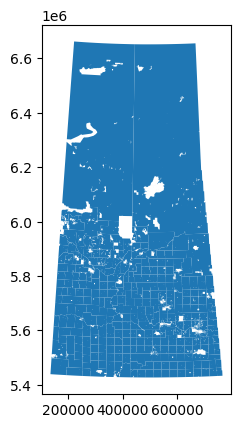

In [43]:
#GIS
directory_main = "/content/drive/MyDrive/PalleteSkills/"
directory_gis= directory_main + 'SK_RM_Shapefiles/RuralMunicipality.shp'
# Reading GIS
gdf_rm=gpd.read_file(directory_gis)

gdf_rm.plot()

# Filter the DataFrame for rows where RMNO matches to RMs of df_1 and df_2's and diplay plot:

<Axes: >

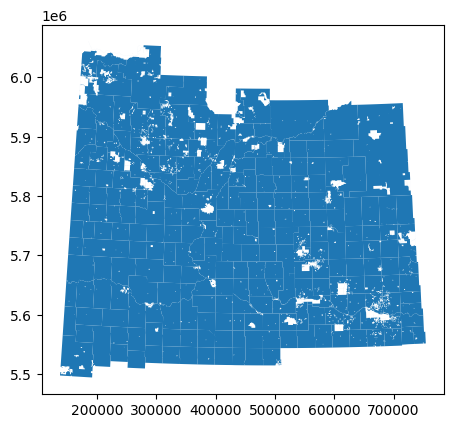

In [44]:
gdf_rm_clean=gdf_rm[['RMNO', 'RMNM', 'geometry']]
# Filter the DataFrame for rows where RMNO matches to RM_Number_df_1n2_str
filtered_gdf = gdf_rm_clean[gdf_rm_clean['RMNO'].isin(RM_Number_df_1n2_str)]
filtered_gdf.plot()

# Marging df_1n2_RM to gdf file in another way:

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

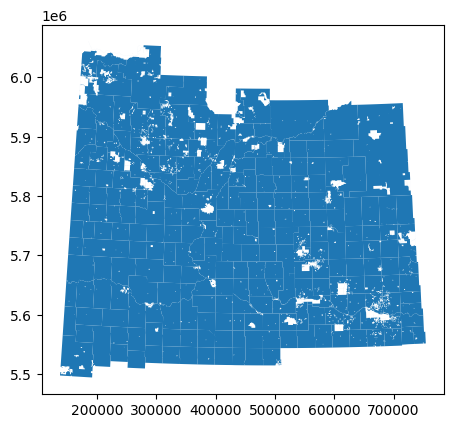

In [45]:
# Convert both columns to string if they are not already
gdf_rm_clean['RMNO'] = gdf_rm_clean['RMNO'].astype(str)

RM_Number_df_1n2_object = pd.DataFrame()
RM_Number_df_1n2_object['RM'] = RM_Number_df_1n2.astype(str)

# Merging RM data with GIS
gdf_rm_marged=pd.merge(gdf_rm_clean.rename(columns={'RMNO':'RM'}), RM_Number_df_1n2_object, on='RM', how='inner')
gdf_rm_marged.plot()

#Colored Map:

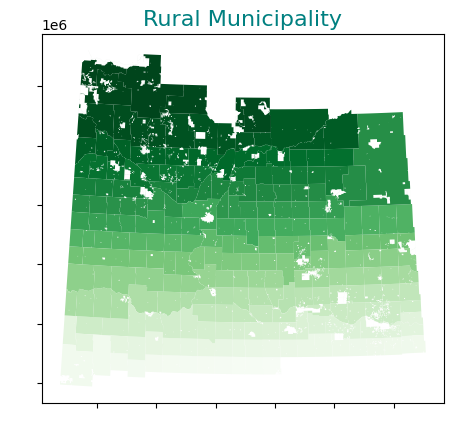

In [46]:
# Plot can be displayed in GitHub
filtered_gdf.plot(column='RMNO',cmap='Greens', legend=False)
plt.title('Rural Municipality', color='teal', size=16)
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()